# Make Calibration WAV Files
## By Terry Bondy, VA3TYB

In [ ]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))

In [ ]:
load "VA3TYB_A_s.mat"

In [ ]:
rows(VA3TYB_A_s)

In [1]:
# Freq = 400:4:400+4*(rows(VA3TYB_A_s)-1);
fcLow = 200;
fcHigh = 2600;
period = 10;
Freq = 200/2:100:2600*2;
T = 0:1/16000:period;

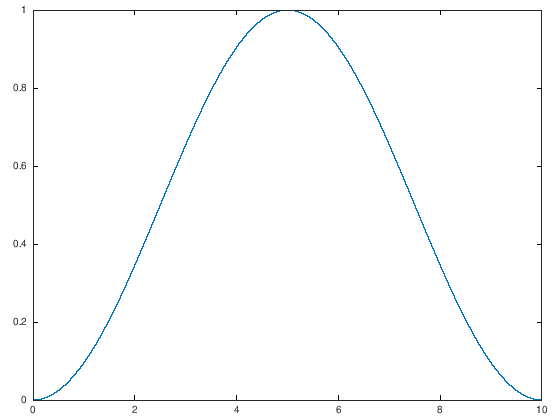

In [2]:
plot(T, (1 - cos(2*pi*T/period))/2);

In [3]:
rc = @(t) (1 - cos(2*pi*t/period))/2;
RC = (1 - cos(2*pi*t/period))/2;
cosArg = 2*pi*Freq';
tic = time();
Sig = arrayfun(@(t) rc(t) * sum(cos(cosArg*t)), T);
printf("toc: %d seconds", time() - tic)

toc: 5.95697 seconds

ans =  52


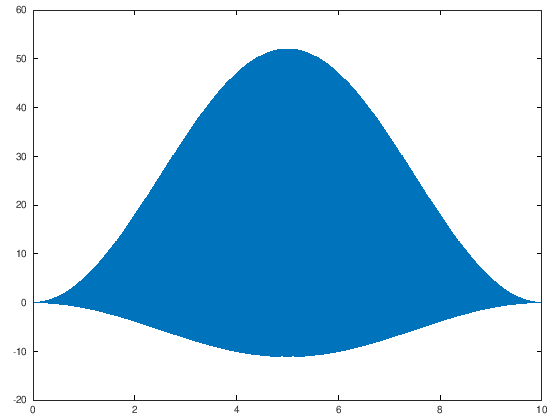

In [4]:
max(abs(Sig))
# A_s' * A_s
plot(T, Sig)

In [ ]:
plot(abs(fft(Sig)))

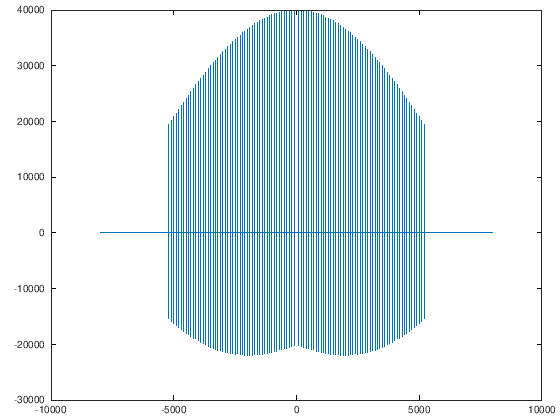

In [5]:
E_cos_pulse = fftshift(fft(Sig));
F_base = linspace(-16000/2, 16000/2, size(E_cos_pulse,2));
plot(F_base, E_cos_pulse)



In [ ]:
Freq
